<a href="https://colab.research.google.com/github/Anjali-V6/Handwritten-digit-recognition-using-MNIST-dataset/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

Loading data

In [3]:
#loading mnist dataset from keras
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Understanding the data

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)
print("size of x_train is ", len(x_train))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
size of x_train is  60000


In [6]:
print(y_train)
print("size of y_train is ", len(y_train))

[5 0 4 ... 5 6 8]
size of y_train is  60000


In [7]:
print(x_test)
print("size of x_test is ", len(x_test))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
size of x_test is  10000


In [8]:
print(y_test)
print("size of y_test is ", len(y_test))

[7 2 1 ... 4 5 6]
size of y_test is  10000


In [9]:
(x_train[0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

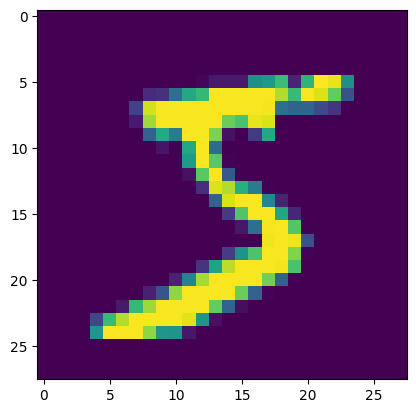

In [10]:
plt.imshow(x_train[0])

In [11]:
print("corresponding number of above handwritten digit is",y_train[0])

corresponding number of above handwritten digit is 5


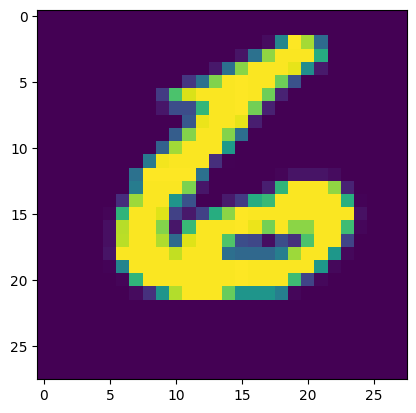

In [12]:
plt.imshow(x_test[9999])

In [13]:
print("corresponding number of above handwritten digit is",y_test[9999])

corresponding number of above handwritten digit is 6


Normalizing every pixel of handwritten digit (picture) between 0 and 1

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Fitting model

In [16]:
model=Sequential()

In [17]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
Total params: 116,992
Trainable params: 116,992
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 8s 3ms/step - loss: 0.4239 - accuracy: 0.8902 - val_loss: 0.2070 - val_accuracy: 0.9402
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1745 - accuracy: 0.9500 - val_loss: 0.1487 - val_accuracy: 0.9571
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1229 - accuracy: 0.9645 - val_loss: 0.1253 - val_accuracy: 0.9632
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0951 - accuracy: 0.9724 - val_loss: 0.1076 - val_accuracy: 0.9687
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0772 - accuracy: 0.9775 - val_loss: 0.0960 - val_accuracy: 0.9724
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0629 - accuracy: 0.9821 - val_loss: 0.1001 - val_accuracy: 0.9699
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0529 - accuracy: 0.9845 - val_loss: 0.0927 - val_accuracy: 0.9732
Epoch 

 PREDICTIONS

In [21]:
model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


array([[1.17428826e-07, 6.08834039e-10, 1.78514019e-05, ...,
        2.16530049e-12, 9.03203727e-12, 7.38673706e-12],
       [1.00883379e-09, 3.25296387e-05, 9.99966502e-01, ...,
        3.70126134e-17, 7.51234712e-17, 2.13675455e-18],
       [5.16464695e-07, 9.97403920e-01, 9.76904994e-05, ...,
        1.22433086e-08, 1.53356510e-08, 1.03497380e-08],
       ...,
       [4.91903989e-13, 7.02326760e-13, 2.72073748e-12, ...,
        5.94484383e-17, 8.47137040e-17, 1.38237651e-15],
       [2.93407849e-13, 1.39903193e-11, 4.86393593e-14, ...,
        2.37150117e-18, 4.82731058e-17, 3.36357147e-17],
       [1.81766019e-10, 7.14161599e-14, 1.11111671e-08, ...,
        1.23134492e-15, 4.90971795e-16, 5.70285155e-16]], dtype=float32)

 EVALUATING THE MODEL

In [22]:
metrics=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9769


In [23]:
print("loss = ", metrics[0])
print("accuracy = ", metrics[1]*100)

loss =  0.07621660828590393
accuracy =  97.68999814987183
